In [1]:
import tifffile as tiff
import matplotlib.pyplot as plt
import rasterio
import os
import numpy as np
%matplotlib inline

In [2]:
#tfile = tiff.imread('ms.tif')
#tfile.shape


(8844, 9282)

In [3]:
#tfile.dtype

dtype('int16')

In [4]:
#tfile

array([[ 98,  97, 100, ..., 628, 634, 628],
       [ 97,  98,  99, ..., 618, 617, 611],
       [ 99,  99,  99, ..., 607, 604, 599],
       ...,
       [ 92,  94,  94, ..., 773, 776, 774],
       [ 92,  93,  95, ..., 755, 764, 766],
       [ 93,  93,  95, ..., 737, 743, 745]], dtype=int16)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f1f90086d68>)

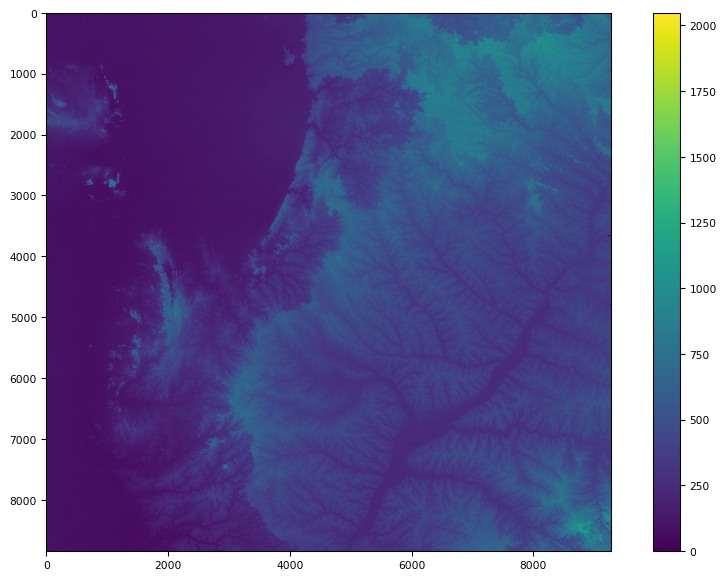

In [5]:
#tiff.imshow(tfile)

In [6]:
with rasterio.open('ms.tif') as src:
        value = src.sample(-20.7681236813448,-54.5123773261632)
        print(value)

<generator object sample_gen at 0x7f5ff6e94c00>


In [2]:
dataset = rasterio.open('ms.tif')

In [3]:
dataset.name

'ms.tif'

In [4]:
dataset.mode

'r'

In [5]:
dataset.closed

False

In [6]:
dataset.count

1

In [7]:
dataset.width

9282

In [8]:
dataset.height

8844

In [9]:
dataset.bounds

BoundingBox(left=-58.4844856, bottom=-24.2495441, right=-50.7495155, top=-16.8795509)

In [10]:
dataset.indexes

(1,)

In [11]:
band1 = dataset.read(1)

In [12]:
band1

array([[ 98,  97, 100, ..., 628, 634, 628],
       [ 97,  98,  99, ..., 618, 617, 611],
       [ 99,  99,  99, ..., 607, 604, 599],
       ...,
       [ 92,  94,  94, ..., 773, 776, 774],
       [ 92,  93,  95, ..., 755, 764, 766],
       [ 93,  93,  95, ..., 737, 743, 745]], dtype=int16)

In [23]:
band1[dataset.height // 2, dataset.width // 2]

539

In [26]:
x, y = (dataset.bounds.left + 10000, dataset.bounds.top - 5000)
row, col = dataset.index(x, y)
row, col

(6000005, 12000046)

In [27]:
band1[row, col]

IndexError: index 6000005 is out of bounds for axis 0 with size 8844

In [28]:
dataset.sample(-20.7681236813448,-54.5123773261632)

<generator object sample_gen at 0x7f5ff6c3c048>

In [29]:
dataset.crs

CRS.from_wkt('LOCAL_CS["projection=br_latlong_sad   units= deg",GEOGCS["unknown",DATUM["unknown",SPHEROID["unretrievable - using WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT[,0.0174532925199433]],UNIT["unknown",1]]')

In [30]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 9282,
 'height': 8844,
 'count': 1,
 'crs': CRS.from_wkt('LOCAL_CS["projection=br_latlong_sad   units= deg",GEOGCS["unknown",DATUM["unknown",SPHEROID["unretrievable - using WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT[,0.0174532925199433]],UNIT["unknown",1]]'),
 'transform': Affine(0.0008333301120448177, 0.0, -58.4844856,
        0.0, -0.0008333325644504749, -16.8795509)}

In [6]:
band_of_interest = 1
row_of_interest = -20.7681236813448
column_of_interest = -54.5123773261632

#-20.7681236813448;-54.5123773261632

In [20]:
with rasterio.open('ms.tif') as dataset:
    band = dataset.read(band_of_interest)
    value_of_interest = band[-55,-19]

In [21]:
band
value_of_interest

713